In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.DESCR)

(1797, 64)
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each e

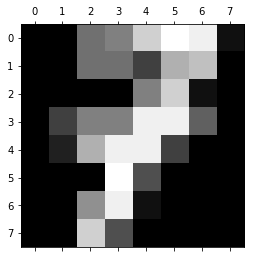

In [6]:
# just the first
%matplotlib inline  
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[7]) 
plt.show()

In [8]:
digits.target[7]

7

In [7]:
digits.data[7]

array([  0.,   0.,   7.,   8.,  13.,  16.,  15.,   1.,   0.,   0.,   7.,
         7.,   4.,  11.,  12.,   0.,   0.,   0.,   0.,   0.,   8.,  13.,
         1.,   0.,   0.,   4.,   8.,   8.,  15.,  15.,   6.,   0.,   0.,
         2.,  11.,  15.,  15.,   4.,   0.,   0.,   0.,   0.,   0.,  16.,
         5.,   0.,   0.,   0.,   0.,   0.,   9.,  15.,   1.,   0.,   0.,
         0.,   0.,   0.,  13.,   5.,   0.,   0.,   0.,   0.])

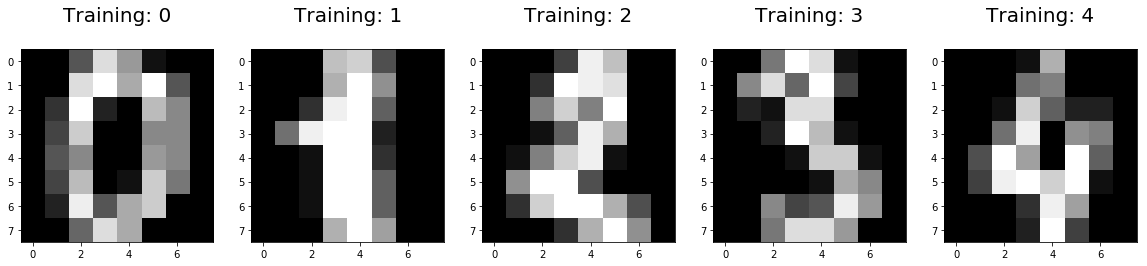

In [9]:
import numpy as np 
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
# using all defaults - you should change parameters
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

In [12]:
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7, 8,
       4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7, 1, 0,
       7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9, 2, 6, 9,
       1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5, 1, 2, 9, 9,
       3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 1, 3, 4, 8, 9, 7,
       9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9, 9, 5, 9, 9, 5, 7,
       5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3, 6, 1, 8, 9, 8, 7, 6,
       7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6, 3, 8, 6, 7, 4, 1, 6, 3,
       0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9, 6, 4, 5, 0, 1, 4, 6, 4, 3,
       3, 0, 9, 5, 3, 2, 1, 4, 2, 1, 6, 9, 9, 2, 4, 9, 3, 7, 6, 2, 3, 3, 1,
       6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1, 9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3,
       7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5, 9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2,
       6, 8, 8, 8, 4, 6, 7, 5, 2, 4, 5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2,
       9, 0,

In [13]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.953333333333


In [15]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions,average='macro')

0.95434782936046836

In [16]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions,average='macro')

0.95430206943257401

In [17]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


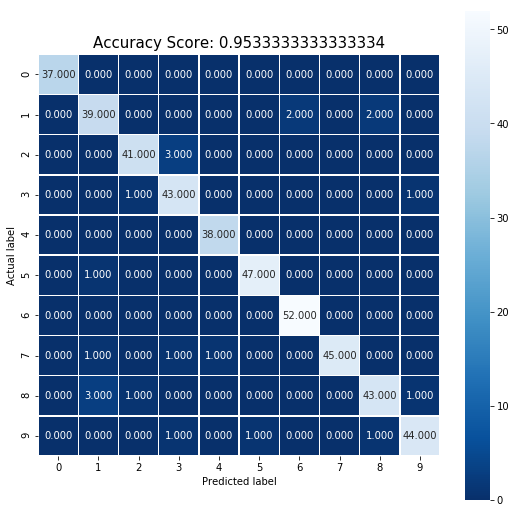

In [18]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [19]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

In [20]:
score = clf.score(x_test, y_test)
print(score)

0.486666666667


In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predictions = gnb.predict(x_test)

In [22]:
score = gnb.score(x_test, y_test)
print(score)

0.833333333333


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

In [24]:
score = knn.score(x_test, y_test)
print(score)

0.98


In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)

In [26]:
score = dt.score(x_test, y_test)
print(score)

0.84


In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)

In [28]:
score = mlp.score(x_test, y_test)
print(score)

0.975555555556


In [29]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
%matplotlib inline

Automatically created module for IPython interactive environment


In [30]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

In [31]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

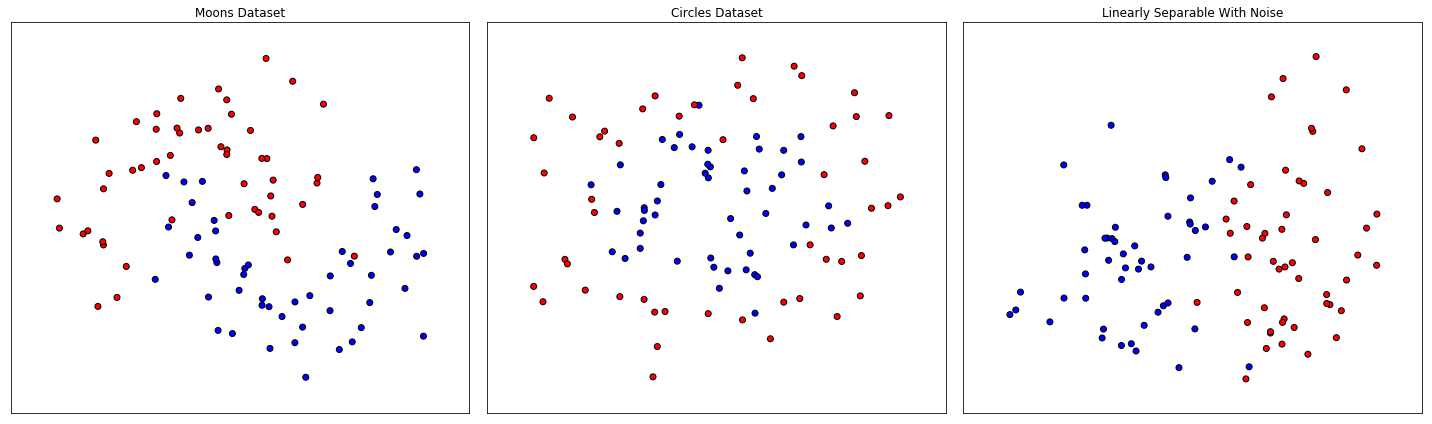

In [32]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
dataset_names = ["Moons Dataset", "Circles Dataset", "Linearly Separable With Noise"]
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 6))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, len(datasets), i)
    ax.set_title(dataset_names[i-1])
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
	
plt.tight_layout()
plt.show()

In [33]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Neural Net", 
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(gamma=2),
    DecisionTreeClassifier(),
    MLPClassifier(),
    GaussianNB()]

Performance of Nearest Neighbors on  Moons Dataset
Accuracy = 0.975
Summary of performance:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97        18
          1       1.00      0.95      0.98        22

avg / total       0.98      0.97      0.98        40

Performance of Linear SVM on  Moons Dataset
Accuracy = 0.875
Summary of performance:
             precision    recall  f1-score   support

          0       0.95      0.82      0.88        22
          1       0.81      0.94      0.87        18

avg / total       0.89      0.88      0.88        40

Performance of RBF SVM on  Moons Dataset
Accuracy = 0.975
Summary of performance:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97        18
          1       1.00      0.95      0.98        22

avg / total       0.98      0.97      0.98        40

Performance of Decision Tree on  Moons Dataset
Accuracy = 0.975
Summary of performance:
        

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Performance of Neural Net on  Moons Dataset
Accuracy = 0.9
Summary of performance:
             precision    recall  f1-score   support

          0       0.95      0.86      0.90        21
          1       0.86      0.95      0.90        19

avg / total       0.90      0.90      0.90        40

Performance of Naive Bayes on  Moons Dataset
Accuracy = 0.875
Summary of performance:
             precision    recall  f1-score   support

          0       0.89      0.85      0.87        20
          1       0.86      0.90      0.88        20

avg / total       0.88      0.88      0.87        40

Performance of Nearest Neighbors on  Circles Dataset
Accuracy = 0.9
Summary of performance:
             precision    recall  f1-score   support

          0       1.00      0.80      0.89        20
          1       0.83      1.00      0.91        20

avg / total       0.92      0.90      0.90        40

Performance of Linear SVM on  Circles Dataset
Accuracy = 0.4
Summary of performance:
         

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Performance of RBF SVM on  Circles Dataset
Accuracy = 0.875
Summary of performance:
             precision    recall  f1-score   support

          0       1.00      0.76      0.86        21
          1       0.79      1.00      0.88        19

avg / total       0.90      0.88      0.87        40

Performance of Decision Tree on  Circles Dataset
Accuracy = 0.8
Summary of performance:
             precision    recall  f1-score   support

          0       0.81      0.72      0.76        18
          1       0.79      0.86      0.83        22

avg / total       0.80      0.80      0.80        40

Performance of Neural Net on  Circles Dataset
Accuracy = 0.775
Summary of performance:
             precision    recall  f1-score   support

          0       1.00      0.64      0.78        25
          1       0.62      1.00      0.77        15

avg / total       0.86      0.78      0.78        40

Performance of Naive Bayes on  Circles Dataset
Accuracy = 0.7
Summary of performance:
          

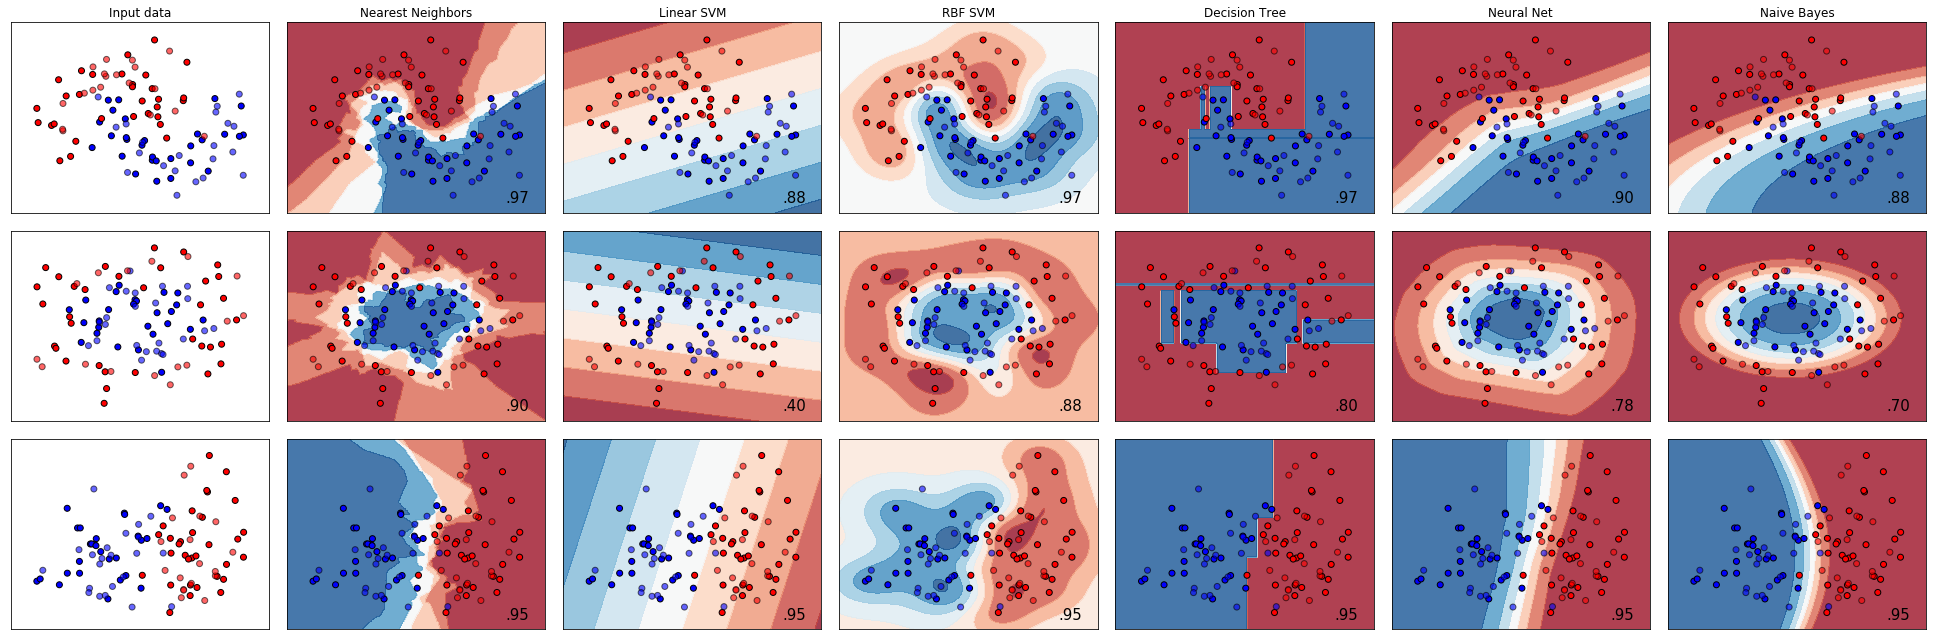

In [34]:
    figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("Performance of "+ str(name) + " on  " + str(dataset_names[ds_cnt]))
        print("Accuracy = " + str(score))
        print("Summary of performance:")
        print(classification_report(clf.predict(X_test), y_test))
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores  
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


In [37]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

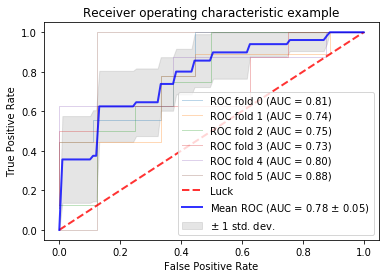

In [38]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [39]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()

In [40]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()

In [41]:
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [43]:
clf.cv_results_

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\utils\depr

{'mean_fit_time': array([ 0.        ,  0.00133499,  0.00133324,  0.        ]),
 'mean_score_time': array([ 0.00133252,  0.00133204,  0.        ,  0.00133292]),
 'mean_test_score': array([ 0.98      ,  0.97333333,  0.97333333,  0.98      ]),
 'mean_train_score': array([ 0.98999802,  0.98336304,  0.97999604,  0.97999604]),
 'param_C': masked_array(data = [1 1 10 10],
              mask = [False False False False],
        fill_value = ?),
 'param_kernel': masked_array(data = ['linear' 'rbf' 'linear' 'rbf'],
              mask = [False False False False],
        fill_value = ?),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'rank_test_score': array([1, 3, 3, 1]),
 'split0_test_score': array([ 1.        ,  0.98039216,  1.        ,  0.98039216]),
 'split0_train_score': array([ 0.97979798,  0.96969697,  0.95959596,  0.95959596]),
 'split1_test_score': array([ 0.96078431,  0.96078431,  0.92156863,  0.96

In [44]:
clf.best_params_
clf.best_estimator_
clf.best_score_

0.97999999999999998

In [45]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [46]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)